In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from src.visual_utils import plot_data_bar, plot_data_line, plot_data_line_multiple, plot_by_segment
from src.stats_utils import calculate_retention, print_basic_stats, find_best_performing_countries

In [2]:
files = glob.glob("data/raw/*.csv.gz")

# Import data
dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)

# Convert date values
df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

# Add new columns for later use.
df["days_after_install"] = (df["event_date"] - df["install_date"]).dt.days
df["total_revenue"] = df["ad_revenue"] + df["iap_revenue"]

In [3]:
country_count = 5

# Clamp the value between 0 and country count
country_count = max(0, min(country_count, df["country"].nunique()))
countries = find_best_performing_countries(df, "user_id", country_count, "nunique")
countries

['Brazil', 'Türkiye', 'Russia', 'United States', 'Vietnam']

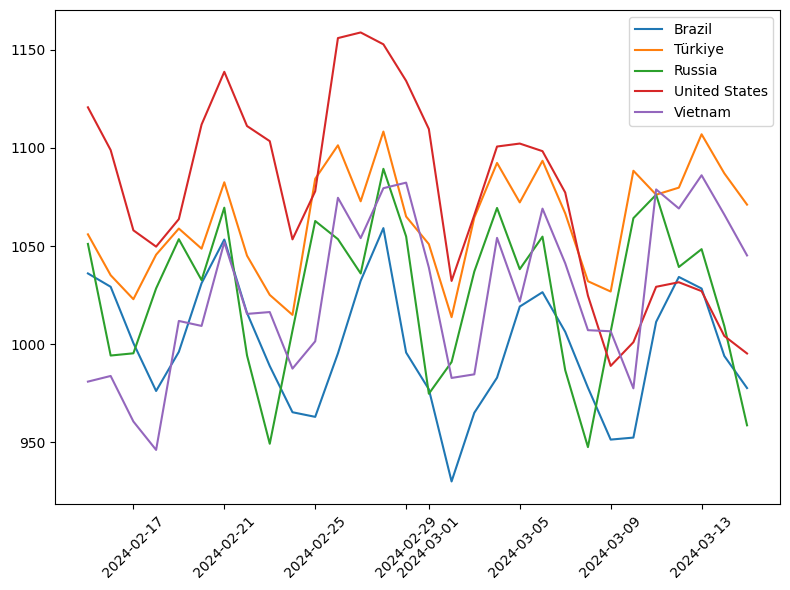

In [5]:
def per_session_duration(segment_df: pd.DataFrame) -> pd.Series:
    total_session_durations = segment_df.groupby("event_date")["total_session_duration"].sum()
    total_session_counts = segment_df.groupby("event_date")["total_session_count"].sum()
    return total_session_durations / total_session_counts

plot_by_segment(df, countries, "country", per_session_duration)